要模拟的目标函数为 $$ sin(2\pi x) + 0.5x^2 $$

Epoch 0, Loss: 3.9433
Epoch 100, Loss: 0.5941
Epoch 200, Loss: 0.4767
Epoch 300, Loss: 0.4457
Epoch 400, Loss: 0.4192
Epoch 500, Loss: 0.3932
Epoch 600, Loss: 0.3639
Epoch 700, Loss: 0.3307
Epoch 800, Loss: 0.2939
Epoch 900, Loss: 0.2599
Epoch 1000, Loss: 0.2332
Epoch 1100, Loss: 0.2137
Epoch 1200, Loss: 0.1987
Epoch 1300, Loss: 0.1862
Epoch 1400, Loss: 0.1751
Epoch 1500, Loss: 0.1648
Epoch 1600, Loss: 0.1557
Epoch 1700, Loss: 0.1482
Epoch 1800, Loss: 0.1424
Epoch 1900, Loss: 0.1380
Epoch 2000, Loss: 0.1348
Epoch 2100, Loss: 0.1324
Epoch 2200, Loss: 0.1303
Epoch 2300, Loss: 0.1286
Epoch 2400, Loss: 0.1271
Epoch 2500, Loss: 0.1258
Epoch 2600, Loss: 0.1244
Epoch 2700, Loss: 0.1232
Epoch 2800, Loss: 0.1221
Epoch 2900, Loss: 0.1214
Epoch 3000, Loss: 0.1199
Epoch 3100, Loss: 0.1189
Epoch 3200, Loss: 0.1179
Epoch 3300, Loss: 0.1169
Epoch 3400, Loss: 0.1160
Epoch 3500, Loss: 0.1150
Epoch 3600, Loss: 0.1142
Epoch 3700, Loss: 0.1135
Epoch 3800, Loss: 0.1125
Epoch 3900, Loss: 0.1116
Epoch 4000, 

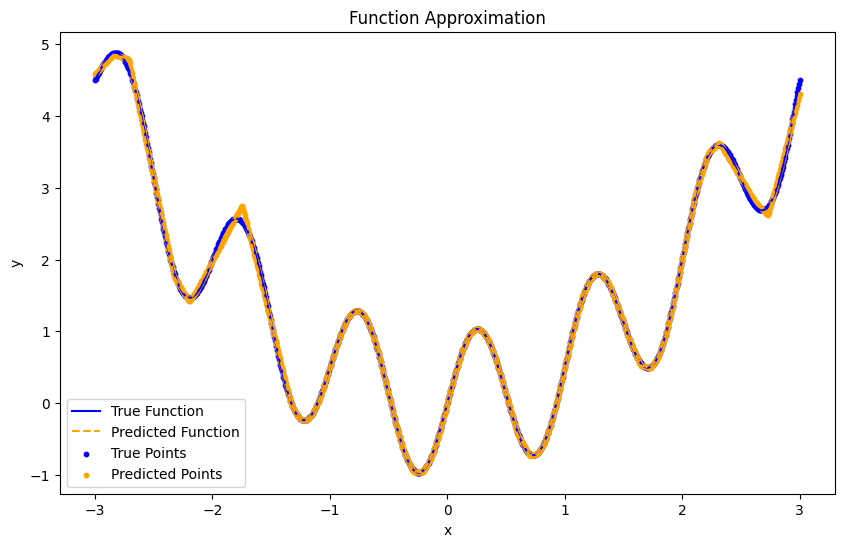

In [3]:
# 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

# 定义目标函数
def target_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * x ** 2

# 数据采集
def generate_data(num_samples=1000, test_size=0.2):
    np.random.seed(0)
    # 在[-3, 3]区间生成num_samples个随机数
    x = np.linspace(-3, 3, num_samples)
    np.random.shuffle(x)
    # 计算目标函数值
    y = target_function(x)
    
    # 分割训练集和测试集
    split_index = int(num_samples * (1 - test_size))
    train_x, test_x = x[:split_index], x[split_index:]
    train_y, test_y = y[:split_index], y[split_index:]
    
    return train_x, train_y, test_x, test_y

# 构建模型
class TwoLayerReLUModel(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=100, output_dim=1):
        super(TwoLayerReLUModel, self).__init__()
        # 定义网络结构，双层全连接网络
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # 定义前向传播过程，每个层使用ReLU激活函数
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 训练模型
def train_model(model, train_x: np.ndarray, train_y: np.ndarray, epochs=1000, lr=0.001):
    # 定义优化器和损失函数
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    # 将数据转换为张量
    train_x_tensor = torch.from_numpy(train_x).float().unsqueeze(1)
    train_y_tensor = torch.from_numpy(train_y).float().unsqueeze(1)

    # 训练模型
    for epoch in range(epochs):
        # 前向传播
        optimizer.zero_grad()
        outputs = model(train_x_tensor)
        # 计算损失
        loss = criterion(outputs, train_y_tensor)
        # 反向传播
        loss.backward()
        # 更新参数
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# 测试模型
def test_model(model, test_x):
    model.eval()
    # 将数据转换为张量
    test_x_tensor = torch.from_numpy(test_x).float().unsqueeze(1)

    # 关闭求导，预测函数值
    with torch.no_grad():
        predictions = model(test_x_tensor)
        # 转换为numpy数组
        predictions = predictions.numpy().flatten()

    # 计算真实值
    true_values = target_function(test_x)

    # 绘制真实值和预测值的曲线图和散点图
    plt.figure(figsize=(10, 6))
    plt.plot(test_x, true_values, label='True Function', color='blue')
    plt.plot(test_x, predictions, label='Predicted Function', linestyle='--', color='orange')
    plt.scatter(test_x, true_values, color='blue', s=10, label='True Points')
    plt.scatter(test_x, predictions, color='orange', s=10, label='Predicted Points')
    plt.legend()
    plt.title('Function Approximation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# 主程序
if __name__ == '__main__':
    # 生成数据
    train_x, train_y, test_x, test_y = generate_data(num_samples=1000, test_size=0.2)

    # 创建模型实例
    model = TwoLayerReLUModel()

    # 训练模型
    train_model(model, train_x, train_y, epochs=10000, lr=0.0005)

    # 生成用于测试的连续x值
    test_x_continuous = np.linspace(-3, 3, 1000)

    # 测试模型并绘制结果
    test_model(model, test_x_continuous)

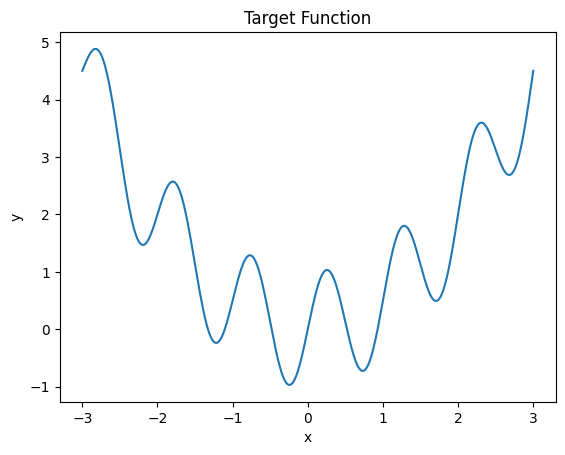

In [4]:
import numpy as np
x = np.linspace(-3, 3, 1000)
y = target_function(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Target Function')
plt.show()